In [265]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import math

### Abstract

Optimization plays a crucial role part in our lives and ignoring it would be foolish and may result in dire consequences. Optimization is a key concept not only in mathematics, computer science, and operations research but also it is essential to the modelling of any system, playing an integral role in computer-aided design (Sukanta Nayak, 2020). 

In recent years, optimization techniques become a considerable part of each system and are applicable in a wide spectrum of industries aerospace, chemical, electrical, electronics, mining, mechanical, information technology, finance, and e-commerce sectors (H  Paul Williams & Wiley, 2013). As the topic of optimization is too wide and complex to be discussed in one article, this paper will serve as an introduction and demonstration of the power and usefull application of linear programming and convex optimization.


First of all the logic behind the process will be explained and an example problem shall be solved to illustrate the application of the concepts in practice. Secondly after the building blocks of linear programming have been presented the article will provide an real-world application of the theory. We will apply linear programming to the realm of finance. Finally the conclusion will reflect on the limitations on linear programing and further posibilities for research.

### What is Linear programming?

We will start with a small, pure math problem that will illustrate what linear programming is and its main parts. Lets say we
have the problem:

maximize: $z = x + 2y$

subject to:

$2x + y \le 20$

$-4x + 5y \le 10$

$-x + 2y \geq -2$

$x \geq 0$

$y \geq 0$

The model above illustrates some of the essential features of an LP model:
1. There is a single linear expression (the objective function) to be maximized
or minimized.
2. There is a series of constraints in the form of linear expressions, which
must not exceed (≤) some speciﬁed value. LP constraints can also be of the
form ‘≥’and‘=’, indicating that the value of certain linear expressions
must not fall below a speciﬁed value or must exactly equal a speciﬁed
value.
3. The set of coefﬁcients 20,10,-2, on the right-hand sides of constraints
is generally known as the right-hand side column.
Practical models will, of course, be much bigger (more variables and
constraints) and more complicated but they must always have the above three
essential features. 


Lets graph them to get a more clear idea how the constraints look. To make it easier we will use slop intercept form of the above inequalities.



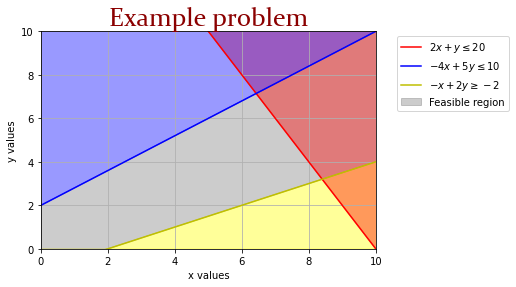

In [266]:
x,y = sym.symbols('x,y')

# We present the expressions in 'ax + b = 0' form in order to asign them to variables
constraint_1 = 2*x+y-20
constraint_2 =-4*x+5*y-10
constraint_3= x-2*y-2

# We take the symbolic expressions  we solve for 'y' and we convert them to numeric expressions.
x_values = np.linspace(0,30,100)


np_constraint_1 = sym.lambdify(x,sym.solve(constraint_1,y)[0])(x_values)
np_constraint_2 = sym.lambdify(x,sym.solve(constraint_2,y)[0])(x_values)
np_constraint_3 = sym.lambdify(x,sym.solve(constraint_3,y)[0])(x_values)

# Plotting
fig, ax = plt.subplots()
plt.plot(x_values,np_constraint_1,'r-', label = r'$2x + y \leq 20$')
plt.plot(x_values,np_constraint_2,'b-', label = r'$-4x + 5y \leq 10$')
plt.plot(x_values,np_constraint_3,'y-', label = r'$-x + 2y \geq -2$')

ax = plt.gca()
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Example problem',fontdict={'family': 'constantia',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        })
plt.grid()


ax.fill_between(x_values,np_constraint_3, color = 'yellow', alpha =.4)
ax.fill_between(x_values,np_constraint_2,np_constraint_3, color = 'grey', alpha=.4,label= 'Feasible region')
ax.fill_between(x_values,np_constraint_1,np.max(np_constraint_1),color = 'red', alpha = .4)
ax.fill_between(x_values,np_constraint_2,np.max(np_constraint_2), color = 'blue', alpha =.4)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Looking at the graph we can see that our function $z = x + 2y$ has all of its feasible solutions, the one that satisfy all its constraints, in the grey area of the graph. However we are interested in the optmial solution, the best option for us considering the parameters we have. We can try to solve this prolbem more or less by hand using, for example, the Simplex algorithm the first practical procedure used to solve the LP problem created by (“Simplex Algorithm - an Overview | ScienceDirect Topics,” 2021).

The algorithm used by the satandard PuLP solver is based on simplex. However, like most solvers, it combines simplex with many other algorithms such as branch-and-bound and cut-generation (pchtsp, 2021). 

Without further ado lets jump into coding the solution for our problem.

In [267]:
#We import the necessary packages
from pulp import *

First we need to create an instance of an linear programming problem and our object function variables

In [268]:
# Initialize a maximization problem by giving a value of '-1' to the 'sense' parameter
example_model = LpProblem(name="example-problem", sense=-1)

# Initialize the decision variables. We set 'lowBound' to '0' as the default value is negative infinity
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

Now we can use the newly created PuLP variables 'x' and 'y' to form our constraints and add them to our model. We don’t need to create lists or matrices. PuLP offers us the ease to just write our constraints as normal expressions in tuple form and add them to the model with the '+=' operator.

$2x + y \le 20$

$-4x + 5y \le 10$

$-x + 2y \geq -2$


In [269]:
# Add the constraints to the model
example_model += (2 * x + y <= 20)
example_model += (4 * x - 5 * y >= -10)
example_model += (-x + 2 * y >= -2)

#Add the objective function
example_model += x + 2*y

Now as we have added all of the elements to our 'model' we can call it to get a string summary of everything in our LP model: varaibles, constraints, objectives etc.

In [270]:
example_model

example-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: 2 x + y <= 20

_C2: 4 x - 5 y >= -10

_C3: - x + 2 y >= -2

VARIABLES
x Continuous
y Continuous

Finally, we’re ready to solve the problem. We can do that by calling .solve() on our model object. We want to use the default solver and therefore we will not pass any arguments. .solve() calls the underlying solver, modifies the model object, and returns the integer status of the solution, which will be 1 if the optimum is found.

You can get the optimization results as the attributes of model. The function value() and the corresponding method .value() return the actual values of the attributes:

In [271]:
example_model.solve()
print("Status:", LpStatus[example_model.status])

Status: Optimal


Now the results of the solver call can be displayed as output to us. Firstly, we request the status of the solution, which can be one of “Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”. The value of prob (pulp.pulp.LpProblem.status) is returned as an integer, which must be converted to its significant text meaning using the LpStatus dictionary. Since LpStatus is a dictionary(dict), its input must be in square brackets:

In [272]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[example_model.status])

# Each of the variables is printed with it's resolved optimum value
xy=[]
for variable in example_model.variables():
    xy.append(variable.varValue)
    print(variable.name, "=", variable.varValue)
    


Status: Optimal
x = 6.42857
y = 7.14286


As we now have the soloution to our linear programming problem we can plot it on our graph

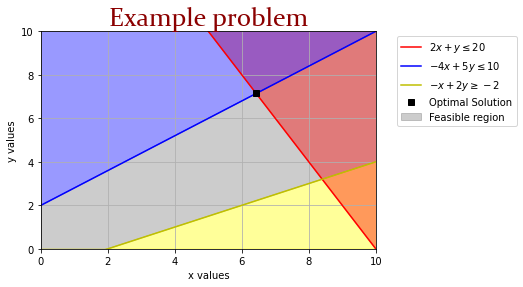

In [273]:
ax.plot(xy[0],xy[1],'ks',label = 'Optimal Solution')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
fig

The solution once plotted can be verified on an intuitive level. The optimal point is maximizing both 'x' and 'y' but not breaking any of the constraints. 

However how does exactly the solver works? We will take another simple linear programming problem and we will apply the simplex algorithm to it and solve it by hand, after which we shall apply the PuLP solver to see if get the same answer! The example will be by no means complicated but this will be done in the interest of time, our aim here is to shed some light on the inner workings of the PuLP solver, again having in mind that the algorithms used there are more advanced.

### Simplex Method 


Our little problem:

Maximize $P = 3x + 4y + z$
Subject to:

$3x + 10y + 5z \le 120$

$5x + 2y + 8z \le 6$

$8x + 10y + 3z \le 105$

$ x,y,z \ge 0$


Our first step is to present the linear problem and its constraints in linear form. How do we do that? We add something called slack variables (Savov, 2020). Wherever we have $\le$ we add a variable and wherever we have $\ge$ we substract one. So lets rewrite our constraints.

$3x + 10y + 5z + v = 120$

$5x + 2y + 8z + u = 6$

$8x + 10y + 3z + w = 105$

Now it is time to transform the objective function into linear form as well. We want to keep the function variable positive and the decision variables negative so we move everything to the left side of the equation. 

$-3x -4y -z + P = 0$

From an equational form, we express the linear program in the form of a simplex tableau.

| x  | y  | z  | v | u | w | P |     |
|----|----|----|---|---|---|---|-----|
| 3  | 10 | 5  | 1 | 0 | 0 | 0 | 120 |
| 5  | 2  | 8  | 0 | 1 | 0 | 0 | 6   |
| 8  | 10 | 3  | 0 | 0 | 1 | 0 | 105 |
| -3 | -4 | -1 | 0 | 0 | 0 | 1 | 0   |


In the tableu we have all the variables from our linear program and their coresponding terms in the constraints, the first three rows, and the objective function the last one. Now if we look closer we can see that the variables v,u,w and P have values in only one of the rows in the tableu, and zero in all other rows. We call these basic variables. 

To be more precise if the column of the variriable is cleared out and has only one non-zero element in it, then that variable is a basic variable. If a column is not cleared out and has more than one non-zero element in it, that variable is non-basic and the value of that variable is zero. The values of all non-basic variables (columns with more than one number in them) are zero. In this tableau, that would be x, y and z.

Next step is to pick the pivot column. To do this we need to think about the objective function. We need to maximize P and the biggest term '4' is behind the variable 'y' so its logical to start optimizing from there. To get our pivot row we divide the constraints and objective function value with the terms from the pivot column:

| x  | y  | z  | v | u | w | P |     |      |
|----|----|----|---|---|---|---|-----|------|
| 3  | 10 | 5  | 1 | 0 | 0 | 0 | 120 | 12   |
| 5  | 2  | 8  | 0 | 1 | 0 | 0 | 6   | 3    |
| 8  | 10 | 3  | 0 | 0 | 1 | 0 | 105 | 10.5 |
| -3 | -4 | -1 | 0 | 0 | 0 | 1 | 0   | 0    |


The pivot row is the row that has the smallest non-negative ratio. If no non-negative ratios can be found, stop, the problem doesn't have a solution (Savov, 2020). Now we look at the intersection of pivot row and pivot column to see which will be the pivot element. For us that will be the second row of the second column or the 'y' term 2. Our goal is to turn 'y' from non-basic to basic variable in the tableu. Our first step of doing this is to divide the whole pivot row by the pivot value, this is to divide row 2 by the value 2

| x   | y  | z  | v | u   | w | P |     |
|-----|----|----|---|-----|---|---|-----|
| 3   | 10 | 5  | 1 | 0   | 0 | 0 | 120 |
| 2.5 | 1  | 4  | 0 | 0.5 | 0 | 0 | 3   |
| 8   | 10 | 3  | 0 | 0   | 1 | 0 | 105 |
| -3  | -4 | -1 | 0 | 0   | 0 | 1 | 0   |


Great! Now we must think of a way to turn the other values of 'y' into zeroes in order for it to become basic. We do it in the following way:

$Row_{1} - 10*Row_{2}$

$Row_{3} - 10*Row_{2}$

$Row_{4} + 4Row_{2}$

| x   | y | z   | v | u   | w | P |    |
|-----|---|-----|---|-----|---|---|----|
| -22 | 0 | -35 | 1 | -5  | 0 | 0 | 90 |
| 2.5 | 1 | 4   | 0 | 0.5 | 0 | 0 | 3  |
| -17 | 0 | -37 | 0 | -5  | 1 | 0 | 75 |
| 7   | 0 | 15  | 0 | 2   | 0 | 1 | 12 |



Great we succeeded with our task to make y non basic. Now our next step is to rinse and repeat, however we can see that there are no negative values in the bottom row which means that our work is done and we have reached the optimal solution. Lets read the tableu. We look at only the basic variables and we get their values from the far most right column

We get:

$y = 3$

$v = 90$

$w = 75$

And the Maximum value of our function 'P' is:

$P = 12$

If we plug the 'y' term in the objective function we clearly see that the result will 12, we also clearly see that this result satisfies all of the uppermentioned constraints. However we also see that the slack variables 'v' and 'w' have values, what does this tell us? Slack variable values can mean three things:

1. If a slack variable associated with a constraint is zero at a particular candidate solution, the constraint is binding there, as the constraint restricts the possible changes from that point.(Wikipedia contributors, 2022)
2. If a slack variable is positive at a particular candidate solution, the constraint is non-binding there, as the constraint does not restrict the possible changes from that point.(Wikipedia contributors, 2022)
3. If a slack variable is negative at some point, the point is infeasible (not allowed), as it does not satisfy the constraint.(Wikipedia contributors, 2022)

Now the question is will Python agrree with our result? Lets find out!

In [274]:
simplex_model = LpProblem(name="simplex_example", sense=LpMaximize)

x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)
z = LpVariable(name="z", lowBound=0)

simplex_model += 3*x + 4*y + z

simplex_model += (3*x +10*y+5*z <= 120)
simplex_model += (5*x +2*y+8*z <= 6)
simplex_model += (8*x +10*y+3*z <= 105)


status = simplex_model.solve()

simplex_variables=[]
for variable in simplex_model.variables():
    simplex_variables.append(variable.varValue)
    print(variable.name, "=", variable.varValue)


x = 0.0
y = 3.0
z = 0.0


Well we can say our hand-math skills are not so rusty! 
$y = 3$ just as we expected. This comaprison between the PuLP solver and our manual take on the problem only shows the beauty and imagination between the power of Python. A few lines of code to crack something we needed few pages and several tables. How about if the problem was bit more complex. If we had to do 5 pivots, 15, 100? Solving linear programmign problems by hand is simply unfeasable and that is why we rely on libraries like PuLP that do the work for us. 

However it is never without use to get a small peak under the hood and see how the engine really works, after all one day we might want to build an engine of our own.

### Optimizing investments

Latest data shows that 58% of americans invest in stocks(Saad, 2019) and the trends are that more and more young people are getting into investing, regardless of the asset at hand. However 90% of people lose money on the stockmarket (Chanda, 2021). As with everything we do it would be wiser to approach the subject in a more scientific way and what better way to try to tackle the problem but with our recently acquired skills in linear programming!

Lets say we have the following investment opportunities

In [478]:
inv_options = pd.read_csv("test_file_lp.csv",delimiter=';')
inv_options

,Designation,Potential Investment,Expected Return,Rating,Risk,Liquidity
0,x1,DSK account,0.040,A,0.0280,Immediate
1,x2,Tokuda Certificate of Deposit,0.052,A,0.0208,5-year
2,x3,7/8 production studio,0.071,B+,0.0284,Immediate
3,x4,Fantastico,0.100,B+,0.0400,Immediate
4,x5,UBB anuity,0.082,A,0.0328,1-year
5,x6,Mini Pernik Bonds,0.065,B+,0.0260,1-year
6,x7,BTV group,0.200,A,0.0800,Immediate
7,x8,Bulgarian State Railways,0.125,C,0.0500,Immediat


Lest strat with our demands towards our portfolio, which will be the constraints of the model.

We have worked hard for several years and we have saved $30,000$ levs but we see that the inflation is eating them away if we keep them under our matrice so we decide to start investing with them.

$Constraint$ 1: $\sum_{i=1}^{8}x_{i}=30,000$

We believe financial analysts know what they are doing when they grade the investments and we want to have at least half of our investments in 'A' grade stocks.

$Constraint 2$: $x_{1}+x_{2}+x_{5}+x_{7} \ge 15,000$

Although our salary covers our needs we do not have a health insurance and want to be able to cash out $10,000$ at any time.

$Constraint$ 3: $x_{1}+x_{3}+x_{4}+x_{7}+x_{8}\geq10,000$

Although, we like the adrenaline rush that investing brings, our main motivation is profit, so we want to put a constraint on the risk we are willing to take.

$Constraint 4$: $\sum_{i=1}^{8}x_{i}j_{i}\leq696$ where $i$ is the investment and $j$ is the coresponding risk associated with it

Now that we have all of our conditions/constraints in place, we can think how can we achieve the highest possible profit while obeying the constraints:


$Maximize  \sum_{i=1}^{8}x_{i}r_{i}$  where $i$ is the investment and $r$ is the return

After we have all of the building bloks of our project in place we can start coding the problem

In [479]:
#Qantifying liquidity
inv_options['Liquidity'] = (inv_options['Liquidity']=='Immediate')
inv_options['Liquidity'] = inv_options['Liquidity'].astype(int)

#Quantifying Investment rating 
inv_options['Rating'] = (inv_options['Rating']=='A')
inv_options['Rating']= inv_options['Rating'].astype(int)


amt_invested = [1]*8
inv_options['Amt_Invested'] = amt_invested
inv_options


,Designation,Potential Investment,Expected Return,Rating,Risk,Liquidity,Amt_Invested
0,x1,DSK account,0.040,1,0.0280,1,1
1,x2,Tokuda Certificate of Deposit,0.052,1,0.0208,0,1
2,x3,7/8 production studio,0.071,0,0.0284,1,1
3,x4,Fantastico,0.100,0,0.0400,1,1
4,x5,UBB anuity,0.082,1,0.0328,0,1
5,x6,Mini Pernik Bonds,0.065,0,0.0260,0,1
6,x7,BTV group,0.200,1,0.0800,1,1
7,x8,Bulgarian State Railways,0.125,0,0.0500,0,1


In [507]:
inv_problem = LpProblem("Portfolio_Opt",LpMaximize)

#Create a list of the investment items
inv_items = list(inv_options['Potential Investment'])
risks = dict(zip(inv_items,inv_options['Risk']))
returns = dict(zip(inv_items,inv_options['Expected Return']))
ratings = dict(zip(inv_items,inv_options['Rating']))
liquidity = dict(zip(inv_items,inv_options['Liquidity']))
amt = dict(zip(inv_items,inv_options['Amt_Invested']))


inv_vars = LpVariable.dicts("Potential Investment",inv_items,lowBound=0,cat='Continuous')

inv_problem += lpSum([returns[i]*inv_vars[i] for i in inv_items])

#Constraints
inv_problem += lpSum([amt[f] * inv_vars[f] for f in inv_items]) == 30000, "Investments" 
inv_problem += lpSum([ratings[f] * inv_vars[f] for f in inv_items]) >= 15000, "Ratings"
inv_problem += lpSum([liquidity[f] * inv_vars[f] for f in inv_items]) >= 10000, "Liquidity"
inv_problem += lpSum([risks[f] * inv_vars[f] for f in inv_items]) <= 696, "Risk"

inv_problem

Portfolio_Opt:
MAXIMIZE
0.071*Potential_Investment_7_8_production_studio + 0.2*Potential_Investment_BTV_group + 0.125*Potential_Investment_Bulgarian_State_Railways_ + 0.04*Potential_Investment_DSK_account + 0.1*Potential_Investment_Fantastico + 0.065*Potential_Investment_Mini_Pernik_Bonds + 0.052*Potential_Investment_Tokuda_Certificate_of_Deposit + 0.082*Potential_Investment_UBB_anuity + 0.0
SUBJECT TO
Investments: Potential_Investment_7_8_production_studio
 + Potential_Investment_BTV_group
 + Potential_Investment_Bulgarian_State_Railways_
 + Potential_Investment_DSK_account + Potential_Investment_Fantastico
 + Potential_Investment_Mini_Pernik_Bonds
 + Potential_Investment_Tokuda_Certificate_of_Deposit
 + Potential_Investment_UBB_anuity = 30000

Ratings: Potential_Investment_BTV_group + Potential_Investment_DSK_account
 + Potential_Investment_Tokuda_Certificate_of_Deposit
 + Potential_Investment_UBB_anuity >= 15000

Liquidity: Potential_Investment_7_8_production_studio
 + Potential_Inv

In [505]:
inv_problem.solve()

1

In [506]:
inv_problem.writeLP("Portfolio_Opt.lp")
print("The optimal portfolio consists of\n"+"-"*110)
var_inv_list=[]
for v in inv_problem.variables():
    var_inv_list.append(v.varValue)
    if v.varValue>0:
        print(v.name, "=", v.varValue)

The optimal portfolio consists of
--------------------------------------------------------------------------------------------------------------
Potential_Investment_DSK_account = 10000.0
Potential_Investment_Tokuda_Certificate_of_Deposit = 20000.0


### Testing the model 

Grand! We have reached a solution, however we still need to put the model to a test to ensure its effectiveness.
Lets create a function that generates random values for our decision variables. We will of course take into consideration the constraints when designing it. After we are finished we will create a trial between the test function and the PuLP solver and see which one provides better results. 

In [625]:
def model_testing(number_of_varaibles, maximum_investment,risk):
    test_variables = np.random.randint(0,maximum_investment,number_of_varaibles)
    test_variables = (test_variables/sum(test_variables))*maximum_investment
    
    while test_variables@risk>696 and np.sum(test_variables[[0,1,4,6]]) <15000 and np.sum(test_variables[[0,2,3,6,7]]) < 10000 :
        model_testing(number_of_varaibles,maximum_investment,risk)

    return test_variables

Unfortunately the code for the testing model gives a deffect as the produced arrays have bigger risk than the one in the condition in the function

In [630]:
test = model_testing(inv_options.shape[0],30000,inv_options["Risk"])
np.dot(test,inv_options["Risk"])

1079.8910075139372

### Conclusion


Although a testing of the model did not occur due to technical issues we have managed to cover the foundations of one of the cornerstone methods in optimization  - linear programming. We started from simple theoretical examples and we saw how quickly and easiliy they can be solved in python. We got introduced to the Simplex algorithm and solved a problem with it. 

However much research is yet to be done. In our practical example we optmized our investments structuring the problem as a linear programming one. In reality however the financial optimizaiton problems are not linear and require more sophisticated methods of optimization, such as quadratic or convex optimization. Furthermore a way of testing the models wil be researched, or created. Finally the data used in future research can and should be taken from some source instead of being simulated. 

### Resources
1. Sukanta Nayak. (2020). Fundamentals of optimization techniques with algorithms. London, United Kingdom ; San Diego, Ca, United States: Academic Press Is An Imprint Of Elsevier.
2. H  Paul Williams, & Wiley, J. (2013). Model building in mathematical programming. Chichester: Wiley, Cop.
3. Simplex Algorithm - an overview | ScienceDirect Topics. (2021, July 13). Retrieved May 22, 2022, from www.sciencedirect.com website: https://www.sciencedirect.com/topics/computer-science/simplex-algorithm#:~:text=4.5.&text=The%20simplex%20algorithm%2C%20developed%20by
4. pchtsp. (2021, May 2). python - Algorithm behind standard pulp solver. Retrieved May 22, 2022, from Stack Overflow website: https://stackoverflow.com/questions/67359004/algorithm-behind-standard-pulp-solver
5. Optimization with PuLP — PuLP 2.6.0 documentation. (n.d.). Retrieved May 22, 2022, from coin-or.github.io website: https://coin-or.github.io/pulp/index.html
6. Saad, L. (2019, September 13). What Percentage of Americans Owns Stock? Retrieved from Gallup.com website: https://news.gallup.com/poll/266807/percentage-americans-owns-stock.aspx
7. Chanda, S. (2021, September). 5 reasons why most people lose money in the stock market? Retrieved May 24, 2022, from www.linkedin.com website: https://www.linkedin.com/pulse/5-reasons-why-most-people-lose-money-stock-market-sumit-chanda/?trk=articles_directory.
8. Savov, I. S. (2020, August). Linear Programming Tutorial. Ivan Savov. https://minireference.github.io/linear_programming/tutorial.pdf
9.Wikipedia contributors. (2022, May 10). Slack variable. Wikipedia. https://en.wikipedia.org/wiki/Slack_variable#:%7E:text=If%20a%20slack%20variable%20is,does%20not%20satisfy%20the%20constraint.